# Learning with Stable Baselines

Following [this video](https://youtu.be/Mut_u40Sqz4?si=yK36iNLywZ19-SEU)


# 1. Import Dependencies

In [12]:
import gymnasium as gym
from stable_baselines3 import PPO

# 2. Load Environment

Starting with the Cart Pole from Open AI Gym found here:
https://gymnasium.farama.org/environments/classic_control/cart_pole/

Open AI Gym Environments have an action and observation space, each can be one of the following object types:

- Box
  - n dimensional tensor, range of values
  - E.g Box `(0,1, shape = (3,3))`
- Discrete
  - Set of items
  - E.g. `Discrete(2)`
  - Used for actions left/right, go/stop, etc
- Tuple
  - Tuple of other spaces
- Dict
  - Dictionary of other spaces
- MultiBinary
  - One hot encoded binary values
- MultiDiscrete
  - Multiple discrete values




In [13]:
# Create env
environment_name = 'CartPole-v1'
env = gym.make(environment_name, render_mode='rgb_array')

## Understanding the Environment

In [14]:
env.action_space.sample()

0

In [15]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([ 1.8975117e+00,  3.0708511e+38, -3.4494284e-01, -1.6237475e+38],
      dtype=float32)

# 3. Train an RL Model

Choosing the right algorithm/learning strategy is important. Model free is the most popular and where most research is happening. SB3 primarily has model free options.

An important note when choosing an algorithm from SB3 is to make sure it will work with the state space. SB3 provides a helpful table here:
https://stable-baselines3.readthedocs.io/en/master/guide/algos.html

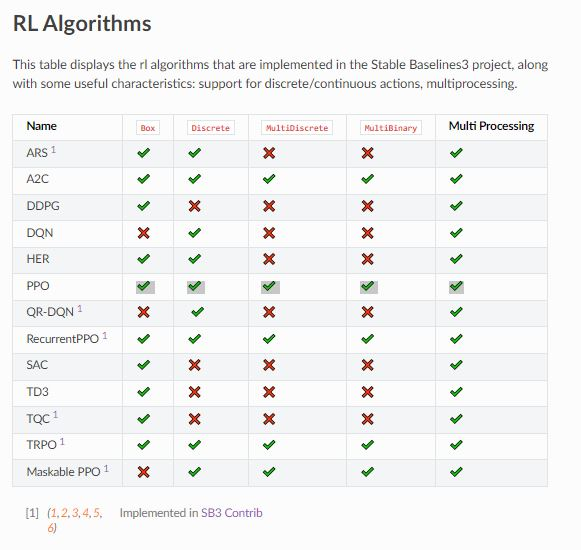


Note: This is not for the observation space, only the action space.

## Understanding Training Metrics / Logger Output

SB3 Metrics/Logging can be a bit confusing. It's important to understand what they mean as they are important for interpreting results.

SB3 has a great doc on this here:
https://stable-baselines3.readthedocs.io/en/master/common/logger.html

Here is an example log:

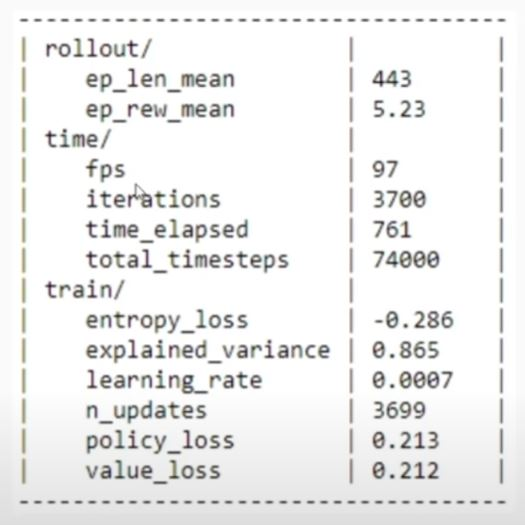

A basic guide for interpreting these:

- eval/
  - ep_len_mean - average length of episode
  - ep_rew_mean - average reward per episode
- time/
  - fps - how fast you're processing
  - iterations - how many episodes?
  - time_elapsed - how long it's been running
  - total_timesteps - how many steps in the episode
- train/
  - entropy_loss -
  - explained_variance -
  - learning_rate - how fast policy is updating
  - n_updates - how many updates we've made to our policy
  - policy_loss -
  - value_loss -

In [60]:
import os

env = gym.make(environment_name)
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [61]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_17
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | 21.7     |
| time/              |          |
|    fps             | 1358     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.1        |
|    ep_rew_mean          | 28.1        |
| time/                   |             |
|    fps                  | 982         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009175263 |
|    clip_fraction        | 0.0945      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00201     

# 4. Save and Reload Model

In [18]:
import os
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')
model.save(PPO_path)

In [8]:
# Deleting and showing that mode.learn won't work

del model

model.learn(total_timesteps=1000)

NameError: name 'model' is not defined

In [9]:
# Same line works now that we have reloaded

model = PPO.load(PPO_path, env)

model.learn(total_timesteps=1000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training\Logs\PPO_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 320      |
|    ep_rew_mean     | 320      |
| time/              |          |
|    fps             | 1431     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------


# 5. Evaluation



In [11]:
from stable_baselines3.common.evaluation import evaluate_policy


evaluate_policy(model, env, n_eval_episodes=10, render=False)

c:\Users\jorde\programming\SB3-Learning\SB3\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(500.0, 0.0)

A score of 200 with a std dev of 0 is considered 'solved' for cart pole!

In [19]:
# It's important for us to close the env before moving on

env.close()

# 6. Test Model

How would we 'deploy' this if we needed to?

In [20]:
#Testing/Playing with unpacking
obs, info = env.reset()

print(f'Observation: {obs}')
print(f'Info: {info}')

Observation: [ 0.01353326  0.04286978 -0.04554811  0.01294499]
Info: {}


In [21]:
action, other = model.predict(obs)

print(f'Action: {action}')
print(f'Other: {other}')

Action: 1
Other: None


In [22]:
obs, reward, done, info, other = env.step(action)

print(f'Observation: {obs}')
print(f'Reward: {reward}')
print(f'Done: {done}')
print(f'Info: {info}')
print(f'Other: {other}')

Observation: [ 0.01439066  0.23861435 -0.04528921 -0.29375386]
Reward: 1.0
Done: False
Info: False
Other: {}


In [23]:
episodes = 5
for episode in range(1, episodes+1):
  obs, info = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action, _ = model.predict(obs) # NOW USING MODEL HERE!
    obs, reward, done, info, _ = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

c:\Users\jorde\programming\SB3-Learning\SB3\Lib\site-packages\gymnasium\envs\classic_control\cartpole.py:215: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode:1 Score:525.0
Episode:2 Score:248.0
Episode:3 Score:349.0
Episode:4 Score:1542.0
Episode:5 Score:295.0


# 7. Viewing Logs in Tensorboard

In [24]:
training_log_path = os.path.join(log_path, 'PPO_2')

In [25]:
training_log_path

'Training\\Logs\\PPO_2'

Run\
`tensorboard --logdir '[path to log files]'` \
to review metrics.

Notes on reviewing and tuning performance:

- Average Reward is a good indication of general performance (depending on suitability of reward)
- Average Episode Length (assuming there is a cutoff condition)

Basic Strategies For Improving Model Performance

- Train for longer
- Hyperparameter Tuning (SB3 supports this with optuna)
- Different Algorithms

# 8. Adding a Callback to the Training Stage

##### We're going to try establish a reward threshold to stop training. This is important so we can stop before they become unstable or overfitted.

Basic callback documentation here:
https://stable-baselines3.readthedocs.io/en/master/guide/callbacks.html

In [63]:
from stable_baselines3.common.callbacks import (
    EvalCallback, #Eval callback is basically a trigger for other callback functions
    StopTrainingOnRewardThreshold,
)

In [64]:
save_path = os.path.join('Training', 'Saved Models')

In [65]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)

#This establishes the 'trigger' of every 10k steps, to run the above callback
eval_callback = EvalCallback(env,
                            callback_on_new_best=stop_callback, 
                            eval_freq = 10000, 
                            best_model_save_path = save_path, 
                            verbose = 1)

Now that these are defined we need to associate them to our model

In [66]:
env = gym.make(environment_name)
# This line is the same as before
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

# SB3 provides a callback parameter to which we can pass our trigger
model.learn(total_timesteps=200000, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training\Logs\PPO_19
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 1387     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29          |
|    ep_rew_mean          | 29          |
| time/                   |             |
|    fps                  | 952         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009004954 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.

# 9. Changing Policies

### It's important to be able to adjust the policy and/or architecture. Here we explore methods of doing that inside SB3.

In [54]:
# The first value is for the custom actor, so we need to pass in pi 4x128 NN
# Value function has the same structure
net_arch = dict(pi=[128,128,128,128], vf=[128,128,128,128])

In [55]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path, policy_kwargs={'net_arch':net_arch})

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [56]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_16
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | 21.8     |
| time/              |          |
|    fps             | 1057     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.4        |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 773         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014939454 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.00923     

c:\Users\jorde\programming\SB3-Learning\SB3\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=167.20 +/- 38.48
Episode length: 167.20 +/- 38.48
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 167          |
|    mean_reward          | 167          |
| time/                   |              |
|    total_timesteps      | 10000        |
| train/                  |              |
|    approx_kl            | 0.0087599745 |
|    clip_fraction        | 0.119        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.571       |
|    explained_variance   | 0.472        |
|    learning_rate        | 0.0003       |
|    loss                 | 14           |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.015       |
|    value_loss           | 45.3         |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 71       |
|    ep_rew_mean     | 71       |

# 10. Using an Alternate Algorithm

In [57]:
from stable_baselines3 import DQN

In [58]:
model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log=log_path,
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [59]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.8     |
|    ep_rew_mean      | 24.8     |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7089     |
|    time_elapsed     | 0        |
|    total_timesteps  | 99       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.914    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 945      |
|    time_elapsed     | 0        |
|    total_timesteps  | 182      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.498    |
|    n_updates        | 20       |
----------------------------------
----------------------------------
| rollout/            | 

c:\Users\jorde\programming\SB3-Learning\SB3\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 13.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 962      |
|    time_elapsed     | 10       |
|    total_timesteps  | 10217    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.102    |
|    n_updates        | 2529     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 961      |
|    time_elapsed     | 10       |
|    total_timesteps  | 10255    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0269   |
|    n_updates      

In [ ]:
model.save